In [43]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


In [45]:
df_train = pd.read_csv('./train.csv')
df_val = pd.read_csv('./val.csv')
df_test = pd.read_csv('./test.csv')

In [46]:
df_train.isnull().values.any(), df_val.isnull().values.any(),df_test.isnull().values.any()

(False, False, False)

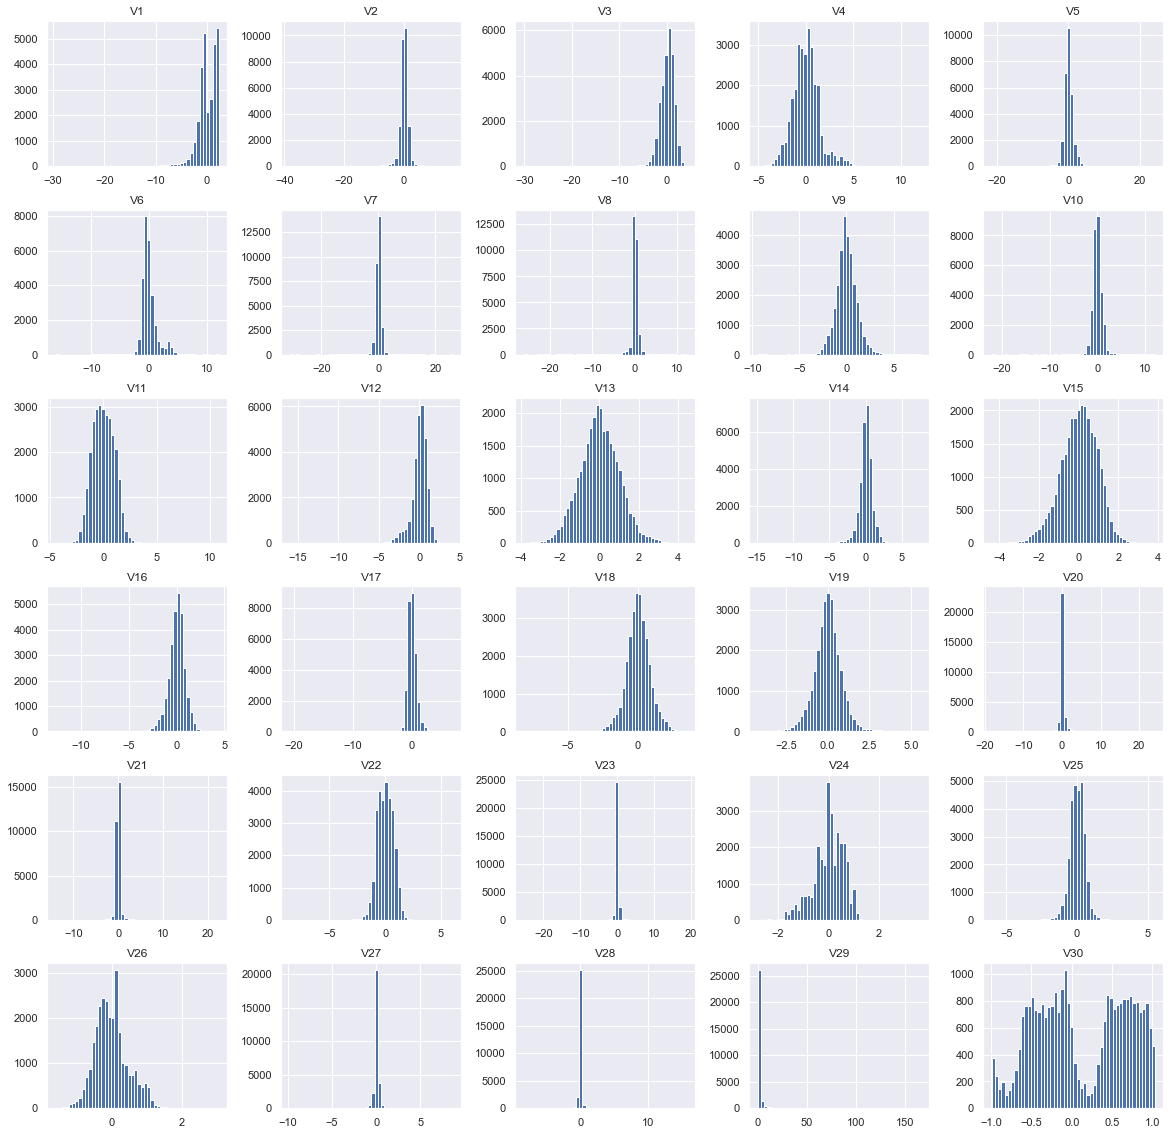

In [47]:
df_val.drop(columns=['ID','Class']).hist(bins = 50, figsize = (20,20))
plt.show()

<AxesSubplot:ylabel='Class'>

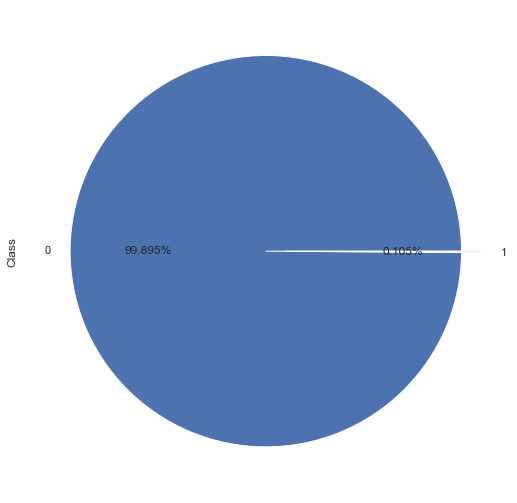

In [48]:
# Visualizing distribution of genuine and fraudulent transactions
sns.set_theme(context = 'notebook', style='darkgrid',palette='dark')
sns.set(rc={'figure.figsize':(12,9)})
df_val.Class.value_counts().plot(kind='pie',autopct='%.3f%%',explode=(0,0.1))

In [49]:
# Label 제거
train_x = df_train.drop(columns=['ID']) 
val_x = df_val.drop(columns=['ID','Class']) 
val_y = df_val['Class'] # Label
test_x = df_test.drop(columns=['ID']) 


In [51]:
out=[]
def Zscore_outlier(train_x):
    m = np.mean(train_x)
    sd = np.std(train_x)
    for i in train_x: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(train_x['LotArea'])

KeyError: 'LotArea'

원본 데이터 형태: (113842, 30)
축소된 데이터 형태: (113842, 2)


Text(0, 0.5, '2nd pc')

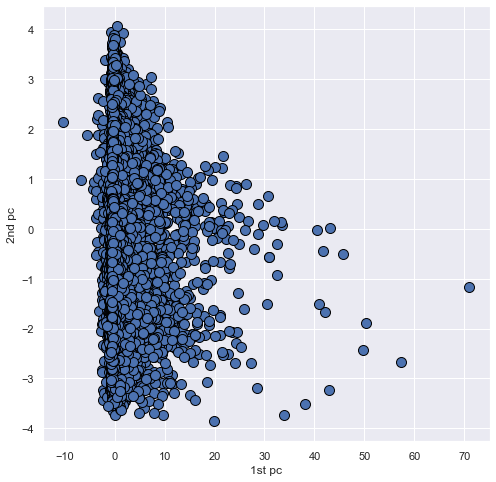

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a5fa47b262ad040a37904d54bcebe443a5edd38079235e6908b42c7790a9516d
  Stored in directory: c:\users\jjun6\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.
